In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = 999
sns.set_style('whitegrid')

# https://metadata.phila.gov/#home/datasetdetails/5543865f20583086178c4ee5/representationdetails/55d624fdad35c7e854cb21a4/

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('PHL_Building_Dataset_Clean.csv')
df.head()

,Unnamed: 0,basements,building_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_type,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,parcel_shape,street_designation,topography,total_area,total_livable_area,type_heater,view_type,year_built,zoning,building_description,section
0,0,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,29.17,A,4.0,220 WHARTON ST,257500.0,2.0,3.0,6.0,2.0,E,ST,F,2625.3,1266.0,H,I,1960.0,RSA5,MASONRY,South
1,1,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.03,A,4.0,222 WHARTON ST,249400.0,2.0,3.0,6.0,2.0,E,ST,F,1622.7,1266.0,A,I,1960.0,RSA5,MASONRY,South
2,2,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.05,A,4.0,224 WHARTON ST,249500.0,2.0,3.0,6.0,2.0,E,ST,F,1624.5,1266.0,A,I,1960.0,RSA5,MASONRY,South
3,3,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.08,A,4.0,226 WHARTON ST,249500.0,2.0,3.0,6.0,2.0,E,ST,F,1627.2,1266.0,H,I,1960.0,RSA5,MASONRY,South
4,4,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.71,A,4.0,228 WHARTON ST,253800.0,2.0,3.0,6.0,2.0,E,ST,F,1683.9,1310.0,H,I,1960.0,RSA5,MASONRY,South


In [5]:
df = df.drop(columns='Unnamed: 0')

In [6]:
df.head()

,basements,building_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_type,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,parcel_shape,street_designation,topography,total_area,total_livable_area,type_heater,view_type,year_built,zoning,building_description,section
0,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,29.17,A,4.0,220 WHARTON ST,257500.0,2.0,3.0,6.0,2.0,E,ST,F,2625.3,1266.0,H,I,1960.0,RSA5,MASONRY,South
1,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.03,A,4.0,222 WHARTON ST,249400.0,2.0,3.0,6.0,2.0,E,ST,F,1622.7,1266.0,A,I,1960.0,RSA5,MASONRY,South
2,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.05,A,4.0,224 WHARTON ST,249500.0,2.0,3.0,6.0,2.0,E,ST,F,1624.5,1266.0,A,I,1960.0,RSA5,MASONRY,South
3,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.08,A,4.0,226 WHARTON ST,249500.0,2.0,3.0,6.0,2.0,E,ST,F,1627.2,1266.0,H,I,1960.0,RSA5,MASONRY,South
4,0,ROW B/GAR 2 STY MASONRY,Y,90.0,4.0,0.0,18.71,A,4.0,228 WHARTON ST,253800.0,2.0,3.0,6.0,2.0,E,ST,F,1683.9,1310.0,H,I,1960.0,RSA5,MASONRY,South


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77620 entries, 0 to 77619
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   basements                  77620 non-null  object 
 1   building_code_description  77620 non-null  object 
 2   central_air                77620 non-null  object 
 3   depth                      77620 non-null  float64
 4   exterior_condition         77620 non-null  float64
 5   fireplaces                 77620 non-null  float64
 6   frontage                   77620 non-null  float64
 7   garage_type                77620 non-null  object 
 8   interior_condition         77620 non-null  float64
 9   location                   77620 non-null  object 
 10  market_value               77620 non-null  float64
 11  number_of_bathrooms        77620 non-null  float64
 12  number_of_bedrooms         77620 non-null  float64
 13  number_of_rooms            77620 non-null  flo

### Re-Categorize Data Categorical to Numerical

In [8]:
df['topography'] = df['topography'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6})

In [9]:
df['topography'].value_counts()

6    69355
1     7147
5      963
2      118
4       20
3       17
Name: topography, dtype: int64

In [10]:
df['zoning'] = df['zoning'].replace({'RSA5 ': 1, 'RSA4 ': 2, 'RSA3 ': 3, 'RSA2 ': 4, 'RSA1 ': 5, 'RSD3 ': 6, 'RSD2 ': 7, 'RSD1 ': 8})

In [11]:
df['zoning'].value_counts()

1    48850
3    13228
2     9060
4     2833
6     2643
8      710
5      278
7       18
Name: zoning, dtype: int64

# =============================================

# Clustering Without PCA

In [12]:
# Clustering by market_value, total_area, total_liveable_area, zoning

In [13]:
cust = df[['market_value', 'total_area', 'total_livable_area', 'zoning']].values

In [14]:
X = cust

# --------------------------------------------------------------------------

### Elbow Analysis Without PCA

In [15]:
score = []

for i in range(2, 21):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit_predict(X)
    score.append(model.inertia_)

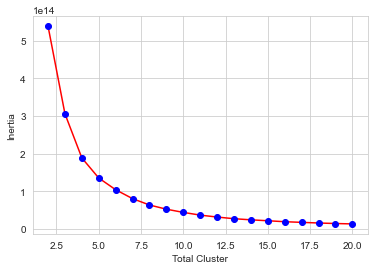

In [16]:
plt.plot(np.arange(2, 21), score, 'r-')
plt.plot(np.arange(2, 21), score, 'bo')
plt.xlabel('Total Cluster')
plt.ylabel('Inertia')
plt.show()

### Silhouette Score Without PCA

In [17]:
score_s = []

for i in range(2, 21):
    model_K = KMeans(n_clusters=i, random_state=42)
    cluster = model_K.fit_predict(X)
    score_s.append(silhouette_score(X, cluster))

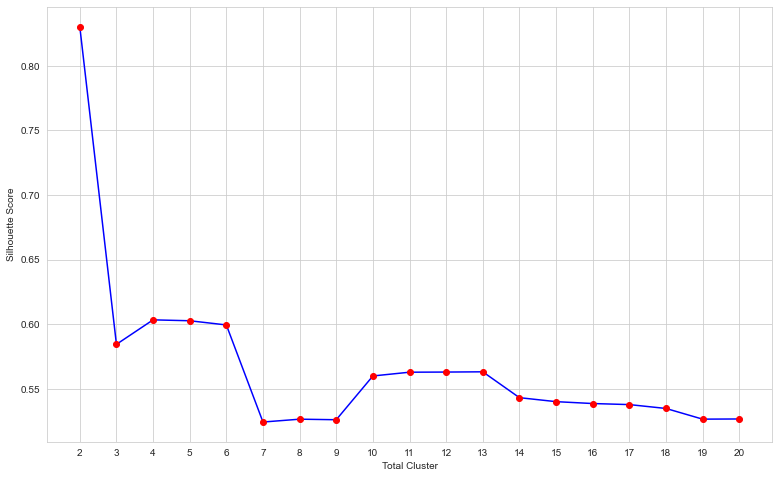

In [18]:
plt.figure(figsize=(13,8))
plt.plot(np.arange(2, 21), score_s, 'b-')
plt.plot(np.arange(2, 21), score_s, 'ro')
plt.xlabel("Total Cluster")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2,21))
plt.show()

# KMeans Without PCA (Non Hierarchical)

In [19]:
Model_KM = KMeans(n_clusters = 5, random_state=42)

In [20]:
Model_KM.fit(X)

KMeans(n_clusters=5, random_state=42)

In [21]:
cluster = Model_KM.predict(X)

In [22]:
df['segment'] = cluster

In [23]:
df['segment'].value_counts()

2    42851
0    28395
3     5243
4      896
1      235
Name: segment, dtype: int64

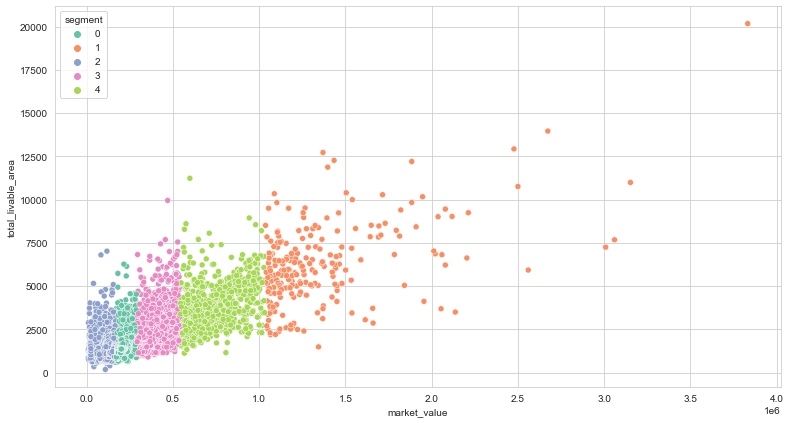

In [24]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'market_value', y = 'total_livable_area', data=df, hue = 'segment', palette = 'Set2' )
plt.show()

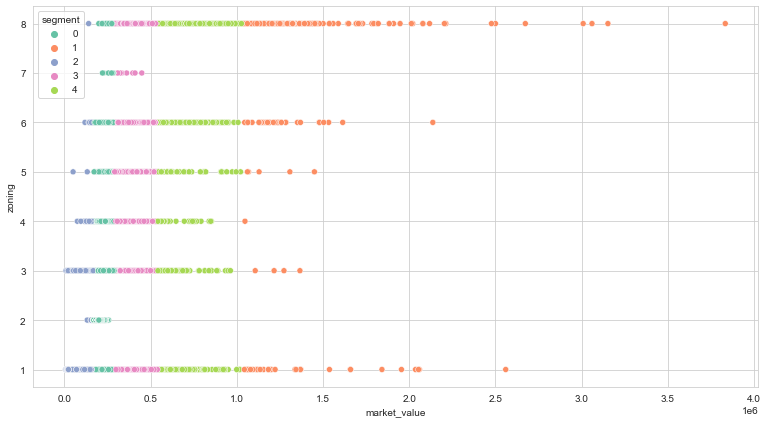

In [25]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'market_value', y = 'zoning', data=df, hue = 'segment', palette = 'Set2')
plt.show()

# --------------------------------------------------------------------------

## Linkage, Dendrogram for Agglomerative Clustering Without PCA

In [26]:
X_dendro = cust[:21]

In [27]:
Z = linkage(X_dendro)

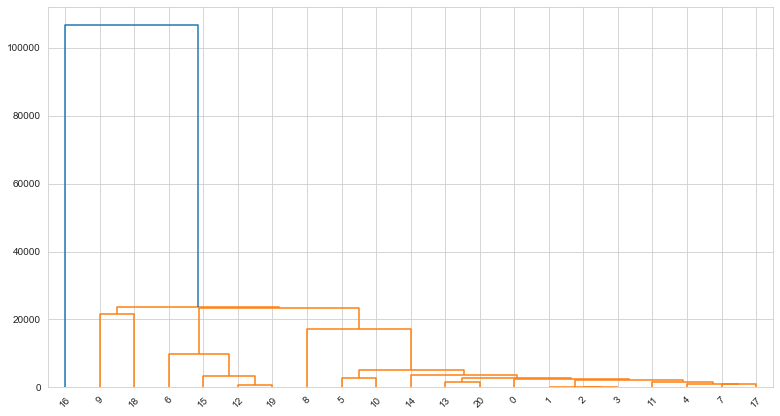

In [28]:
plt.figure(figsize=(13,7))
dendrogram(Z);

# Agglomerative Clustering Without PCA (Hierarchical)

In [29]:
ahc = AgglomerativeClustering(n_clusters=5)

In [30]:
model_aglo = ahc.fit_predict(X)

In [31]:
df_aglo = df.copy()
df_aglo.drop(columns = 'segment', inplace = True)
df_aglo['segment'] = model_aglo

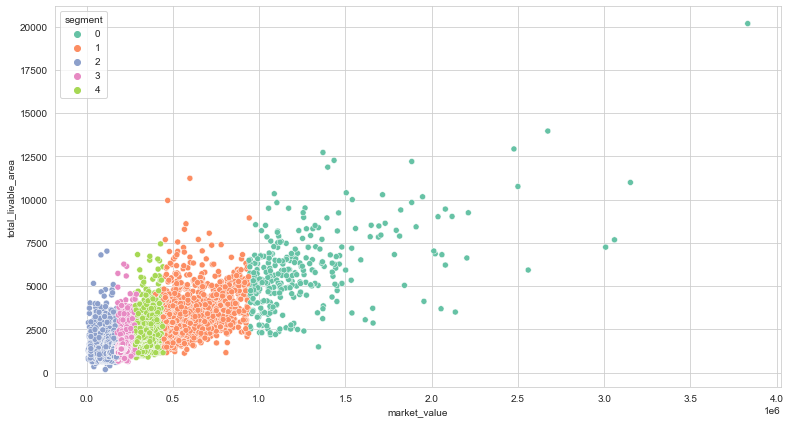

In [32]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'market_value', y = 'total_livable_area', data=df_aglo, hue = 'segment', palette = 'Set2' )
plt.show()

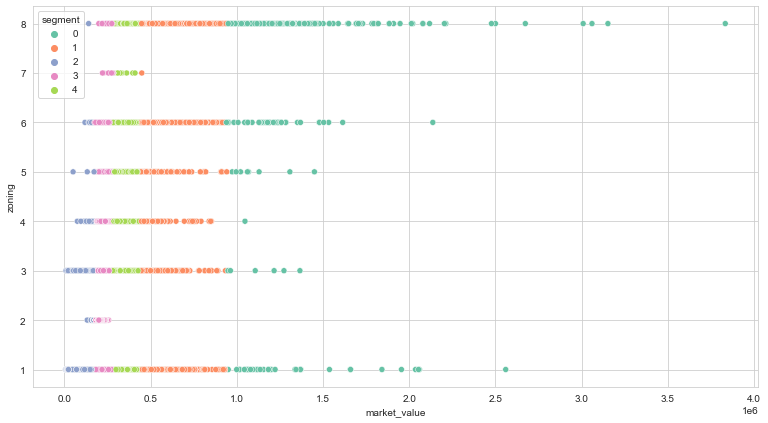

In [33]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'market_value', y = 'zoning', data=df_aglo, hue = 'segment', palette = 'Set2')
plt.show()

# --------------------------------------------------------------------------

# Gaussian Mixture Without PCA

In [34]:
gaus = GaussianMixture(n_components=5)

In [35]:
model_gaus = gaus.fit_predict(X)

In [36]:
df_gaus = df.copy()
df_gaus.drop(columns = 'segment', inplace = True)
df_gaus['segment'] = model_gaus

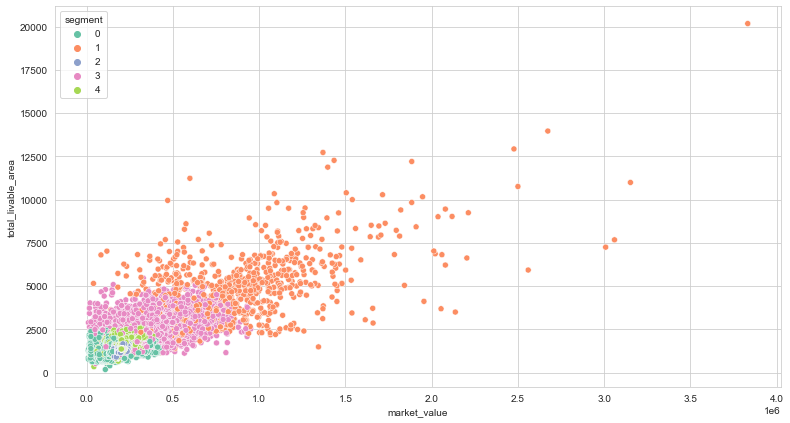

In [37]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'market_value', y = 'total_livable_area', data=df_gaus, hue = 'segment', palette = 'Set2' )
plt.show()

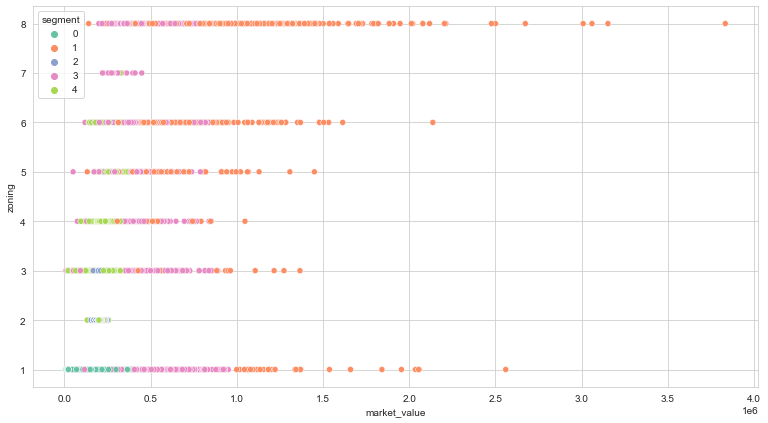

In [38]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'market_value', y = 'zoning', data=df_gaus, hue = 'segment', palette = 'Set2')
plt.show()

# =============================================

# Clustering With PCA 

In [39]:
pca = PCA(n_components=2, whiten=True)

In [40]:
df_PCA = df.copy()
df_PCA.drop(columns = 'segment', inplace = True)

In [41]:
df_PCA_oh = df[['basements', 'central_air', 'depth', 'exterior_condition', 'frontage', 'garage_type', 'interior_condition', 'market_value', 'number_of_bathrooms', 'number_of_bedrooms', 'number_of_rooms', 'number_stories', 'parcel_shape', 'topography', 'total_area', 'total_livable_area', 'type_heater', 'view_type', 'year_built', 'zoning', 'building_description']]

In [42]:
df_PCA_oh = pd.get_dummies(data = df_PCA_oh, columns = ['basements'])
df_PCA_oh = pd.get_dummies(data = df_PCA_oh, columns = ['central_air'])
df_PCA_oh = pd.get_dummies(data = df_PCA_oh, columns = ['garage_type'])
df_PCA_oh = pd.get_dummies(data = df_PCA_oh, columns = ['parcel_shape'])
df_PCA_oh = pd.get_dummies(data = df_PCA_oh, columns = ['type_heater'])
df_PCA_oh = pd.get_dummies(data = df_PCA_oh, columns = ['view_type'])
df_PCA_oh = pd.get_dummies(data = df_PCA_oh, columns = ['building_description'])

In [43]:
pca2 = pca.fit_transform(df_PCA_oh)

In [44]:
df_afterPCA = pd.DataFrame(data = pca2, columns = ['PCA1', 'PCA2'])

In [45]:
X_PCA = df_afterPCA.values

# --------------------------------------------------------------------------

### Elbow Analysis (With PCA)

In [46]:
score_pca = []

for i in range(2, 21):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit_predict(X_PCA)
    score_pca.append(model.inertia_)

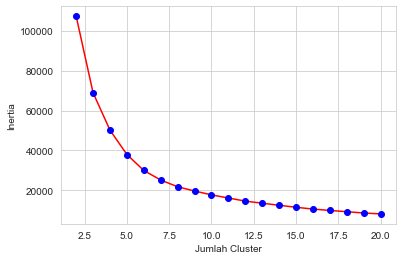

In [47]:
plt.plot(np.arange(2, 21), score_pca, 'r-')
plt.plot(np.arange(2, 21), score_pca, 'bo')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

### Silhouette Score (With PCA)

In [48]:
score_s_pca = []

for i in range(2, 21):
    model_K = KMeans(n_clusters=i, random_state=42)
    cluster = model_K.fit_predict(X_PCA)
    score_s_pca.append(silhouette_score(X_PCA, cluster))

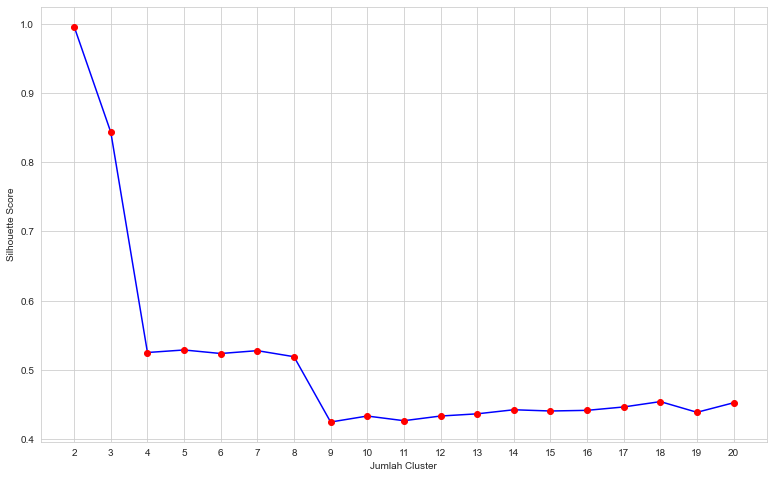

In [49]:
plt.figure(figsize=(13,8))
plt.plot(np.arange(2, 21), score_s_pca, 'b-')
plt.plot(np.arange(2, 21), score_s_pca, 'ro')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2,21))
plt.show()

# KMeans With PCA (Non Hierarchical)

In [50]:
kmeans2 = KMeans(n_clusters=5)

In [51]:
model_kmeanspca = kmeans2.fit_predict(X_PCA)

In [52]:
df_KMPCA = df_afterPCA.copy()
df_KMPCA['segment'] = model_kmeanspca

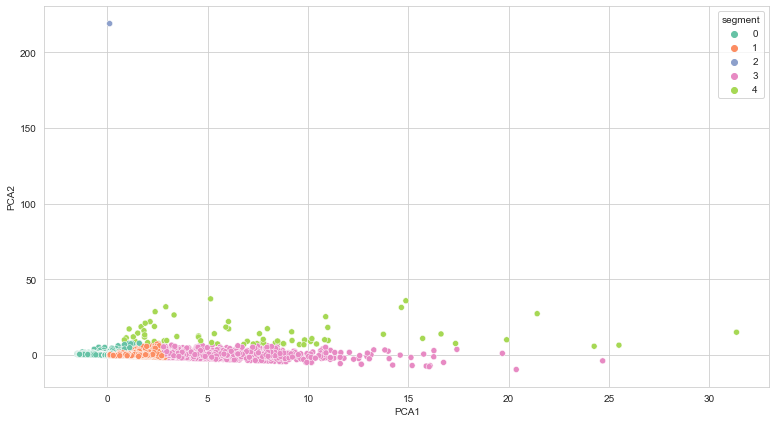

In [53]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'PCA1', y = 'PCA2', data=df_KMPCA, hue = 'segment', palette = 'Set2' )
plt.show()

# --------------------------------------------------------------------------

### Linkage, Dendrogram With PCA

In [54]:
X_dendro_PCA = X_PCA[:21]

In [55]:
Z_PCA = linkage(X_dendro_PCA)

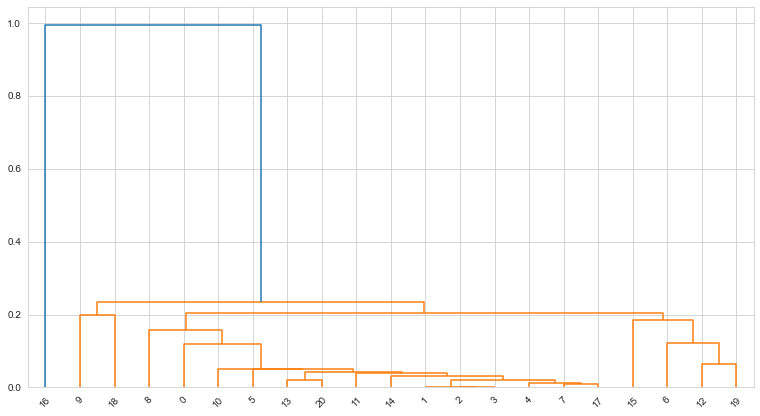

In [56]:
plt.figure(figsize=(13,7))
dendrogram(Z_PCA);

# Agglomerative Clustering With PCA (Hierarchical)

In [57]:
aglopca = AgglomerativeClustering(n_clusters=5)

In [58]:
model_aglopca = aglopca.fit_predict(X_PCA)

In [59]:
df_aglopca = df_afterPCA.copy()
df_aglopca['segment'] = model_aglopca

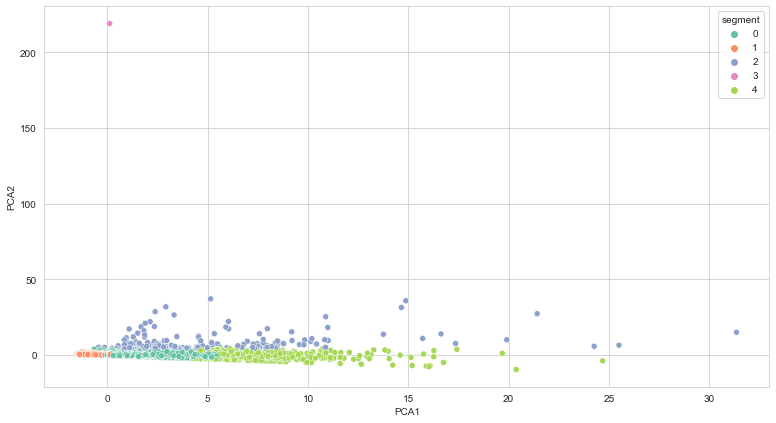

In [60]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'PCA1', y = 'PCA2', data=df_aglopca, hue = 'segment', palette = 'Set2' )
plt.show()

# --------------------------------------------------------------------------

# Gaussian Mixture With PCA

In [61]:
gauspca = GaussianMixture(n_components=5)

In [62]:
model_gauspca = gauspca.fit_predict(X_PCA)

In [63]:
df_gauspca = df_afterPCA.copy()
df_gauspca['segment'] = model_gauspca

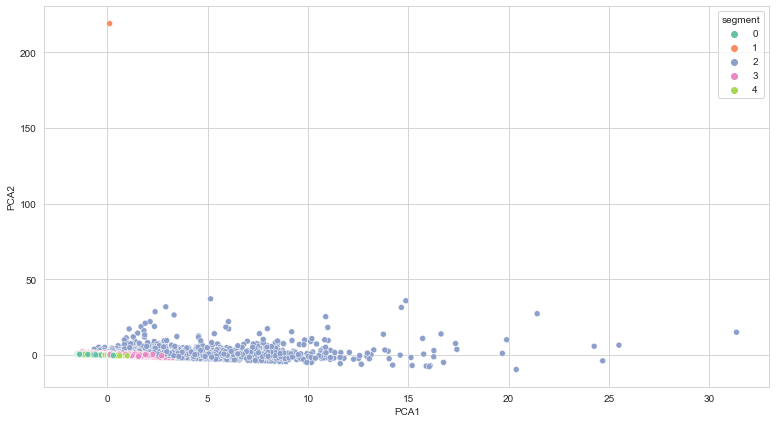

In [64]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'PCA1', y = 'PCA2', data=df_gauspca, hue = 'segment', palette = 'Set2' )
plt.show()

# --------------------------------------------------------------------------

# Conclusion

After we made a clusters model from Unsupervised Machine Learning such as KMeans, AgglomerativeClustering, GaussianMixture,  both without PCA and with PCA, then we decided to choose **KMeans without PCA with 5 clusters**, because there have better score from Elbow Analysis and Silhouette Score by using 5 clusters, and also lighten our computers load compared using 
AgglomerativeClustering Model. And we can intrepret that clusters model based on market value, total area, total livable area, and section.

# --------------------------------------------------------------------------

### Now the Data is Ready for Exploratory Data Analysis, we move to the next Jupyter Notebook !